In [1]:
# import basic libraries for dataframe usage and viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
## remove this cell before submitting

os.listdir()

['.ipynb_checkpoints',
 'SMS_Eligible_Received_SMS_Presented.ipynb',
 'sms_received_appointment_presented.csv']

In [3]:
# this function will greatly simplify getting percentages based on condition
# this can be used as a template if you want to change the equality operator to inequality (>,<, etc..)
def column_percentage_calculator(df, column_name, condition):
    total_rows = df.shape[0]
    num_matched_rows = len(df.loc[(df[column_name] == condition)])
    percentage_matches_condition = (num_matched_rows / total_rows) * 100
    return percentage_matches_condition

## It can be assumed that each row that is in data frame was eligible to receive a SMS reminder as the csv it is based on contains only rows from the original dataset that were eligible to recieve SMS reminders.

In [4]:
# import df with pandas and visually inspect the head 
sms_received_appointment_presented_df = pd.read_csv('sms_received_appointment_presented.csv')
sms_received_appointment_presented_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num,Age Group,Interval Group
0,F,15,0,0,0,0,0,1,0,2,4,Youth,2 - 30
1,F,30,1,0,0,0,0,1,0,2,4,Young Adult,2 - 30
2,M,46,0,1,0,0,0,1,0,2,4,Adult,2 - 30
3,F,38,1,0,0,0,0,1,0,3,4,Adult,2 - 30
4,M,85,0,1,0,0,0,1,0,8,4,Older Adult and Seniors,2 - 30


In [5]:
# examine df general stats
sms_received_appointment_presented_df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num
count,25584.000000,25584.000000,25584.000000,25584.000000,25584.000000,25584.000000,25584.0,25584.0,25584.000000,25584.000000
mean,38.817777,0.090252,0.205754,0.069692,0.022240,0.013954,1.0,0.0,17.329151,1.676087
std,22.590680,0.286548,0.404259,0.254632,0.147468,0.117302,0.0,0.0,15.814378,1.269106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,5.000000,1.000000
50%,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,13.000000,2.000000
75%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,26.000000,3.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,90.000000,5.000000


In [6]:
# examine df structure
sms_received_appointment_presented_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25584 entries, 0 to 25583
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          25584 non-null  object
 1   Age             25584 non-null  int64 
 2   Scholarship     25584 non-null  int64 
 3   Hipertension    25584 non-null  int64 
 4   Diabetes        25584 non-null  int64 
 5   Alcoholism      25584 non-null  int64 
 6   Handicap        25584 non-null  int64 
 7   SMS_received    25584 non-null  int64 
 8   No-show         25584 non-null  int64 
 9   Days_Between    25584 non-null  int64 
 10  Day_Num         25584 non-null  int64 
 11  Age Group       25584 non-null  object
 12  Interval Group  25584 non-null  object
dtypes: int64(10), object(3)
memory usage: 2.5+ MB


## AGE

<AxesSubplot:ylabel='Frequency'>

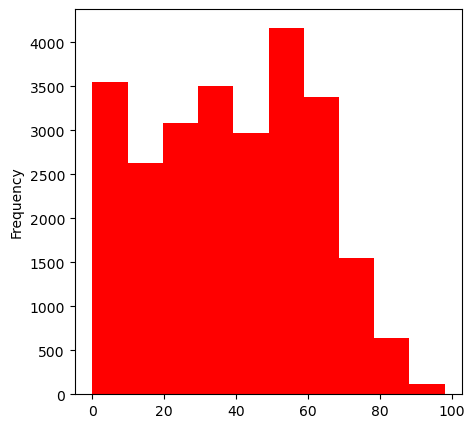

In [7]:
sms_received_appointment_presented_df.Age.plot(kind='hist', figsize=(5,5), color='red')

In [8]:
# calculate the median age for SMS-Eligible appointments that DID RECEIVE SMS REMINDER AND PRESENTED
age_median = sms_received_appointment_presented_df.Age.median()
print('{} is the median age.'.format(age_median))

40.0 is the median age.


## DAYS_BETWEEN

<AxesSubplot:ylabel='Frequency'>

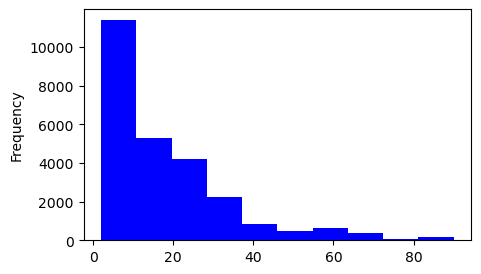

In [9]:
# visualize 'Days_Between' column distribution
sms_received_appointment_presented_df.Days_Between.plot(kind='hist', figsize=(5,3), color='blue')

In [10]:
# calculate percent each gender of 'SMS-Eligible Did-Receive SMS' rows with column_percentage_calculator already defined
sms_eligible_did_receive_SMS_male_percent = column_percentage_calculator(sms_received_appointment_presented_df, 'Gender', 'M')
sms_eligible_did_receive_SMS_female_percent = column_percentage_calculator(sms_received_appointment_presented_df, 'Gender', 'F')
print('{}% of SMS-Received and Presented appointments were for male patients.'.format(round(sms_eligible_did_receive_SMS_male_percent, 2)))
print('{}% of SMS-Received and Presented appointments were for female patients.'.format(round(sms_eligible_did_receive_SMS_female_percent, 2)))

31.95% of SMS-Received and Presented appointments were for male patients.
68.05% of SMS-Received and Presented appointments were for female patients.


## GENDER

Text(0.5, 1.0, 'No-Show Gender Percentage')

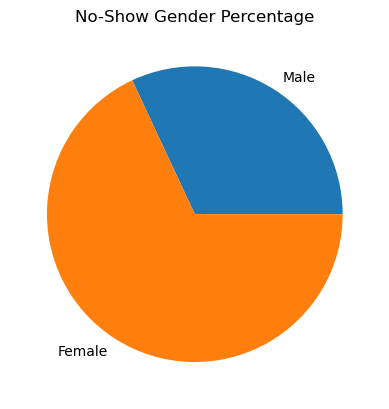

In [11]:
# visualize gender binary distribution
gender_percents = [sms_eligible_did_receive_SMS_male_percent, sms_eligible_did_receive_SMS_female_percent ]
labels = ['Male', 'Female']

fig, ax = plt.subplots()
ax.pie(gender_percents, labels = labels)
ax.set_title('SMS-Received and Presented Gender Percentage')

## INTERVAL GROUP

In [12]:
# obtain percentages of Interval Groups using the column_percentage_calculator function defined earlier 
two_to_thirty_percentage = column_percentage_calculator(sms_received_appointment_presented_df, 'Interval Group', '2 - 30')
num_thirtyone_to_sixty_percentage = column_percentage_calculator(sms_received_appointment_presented_df, 'Interval Group', '31 - 60')
num_sixtyone_to_ninety_percentage = column_percentage_calculator(sms_received_appointment_presented_df, 'Interval Group', '61 - 90')

print('Percentage of SMS-Received and Presented appointments scheduled between 2 and 30 days out ---> {}%'.format(round(two_to_thirty_percentage,2)))
print('Percentage of SMS-Received and Presented scheduled between 31 and 60 days out ---> {}%'.format(round(num_thirtyone_to_sixty_percentage, 2)))
print('Percentage of SMS-Received and Presented appointments scheduled between 61 and 90 days out ---> {}%'.format(round(num_sixtyone_to_ninety_percentage, 2)))

Percentage of SMS-Received and Presented appointments scheduled between 2 and 30 days out ---> 83.78%
Percentage of SMS-Received and Presented scheduled between 31 and 60 days out ---> 12.9%
Percentage of SMS-Received and Presented appointments scheduled between 61 and 90 days out ---> 3.31%


<AxesSubplot:>

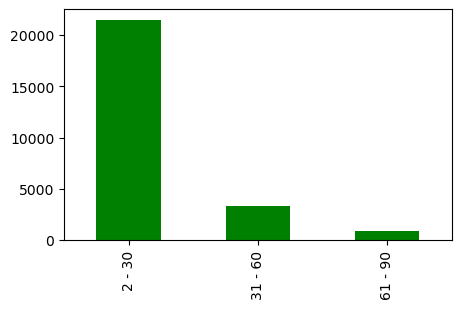

In [13]:
# visualize Interval Group categorical distribution in a bar plot
sms_received_appointment_presented_df['Interval Group'].value_counts().plot(kind='bar', figsize =(5,3), color='green')

## AGE BRACKETS

In [14]:
# calculate percentage for age group categorical column values
sms_eligible_youth_percentage = column_percentage_calculator(sms_received_appointment_presented_df, 'Age Group', 'Youth')
sms_eligible_young_adult_percentage = column_percentage_calculator(sms_received_appointment_presented_df, 'Age Group', 'Young Adult')
sms_eligible_adult_percentage = column_percentage_calculator(sms_received_appointment_presented_df, 'Age Group', 'Adult')
sms_eligible_older_adult_percentage = column_percentage_calculator(sms_received_appointment_presented_df, 'Age Group', 'Older Adult and Seniors')

print('Percentage of SMS-Received and Presented appointments for Youths {}%'.format(round(sms_eligible_youth_percentage, 2)))
print('Percentage of SMS-Received and Presented appointments for Young Adults {}%'.format(round(sms_eligible_young_adult_percentage, 2)))
print('Percentage of SMS-Received and Presented appointments for Adults {}%'.format(round(sms_eligible_adult_percentage, 2)))
print('Percentage of SMS-Received and Presented appointments for Older Adults and Seniors {}%'.format(round(sms_eligible_older_adult_percentage, 2)))

Percentage of SMS-Received and Presented appointments for Youths 22.86%
Percentage of SMS-Received and Presented appointments for Young Adults 22.78%
Percentage of SMS-Received and Presented appointments for Adults 27.28%
Percentage of SMS-Received and Presented appointments for Older Adults and Seniors 27.08%


<AxesSubplot:>

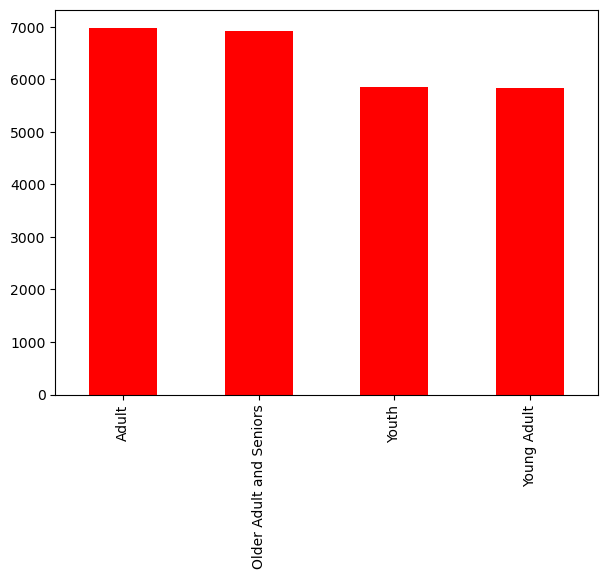

In [15]:
# create basic viz for age brackets/buckets
sms_received_appointment_presented_df['Age Group'].value_counts().plot(kind='bar', figsize=(7,5), color='red')

## CONDITIONS

__As each 'condition' is it's own column and the values are only binary (0 for no, 1 for yes), the percentages for these variables WRT to all ROWS THAT DID RECEIVE SMS REMINDER AND PRESENTED AT THE APPOINTMENT was obtained from the .describe() command and its output above. These values and respective labels will be used to visualize these variables on a bar graph.__

[Text(0, 0, 'Handicap'),
 Text(1, 0, 'Alcoholism'),
 Text(2, 0, 'Diabetes'),
 Text(3, 0, 'Scholarship Program'),
 Text(4, 0, 'Hypertension')]

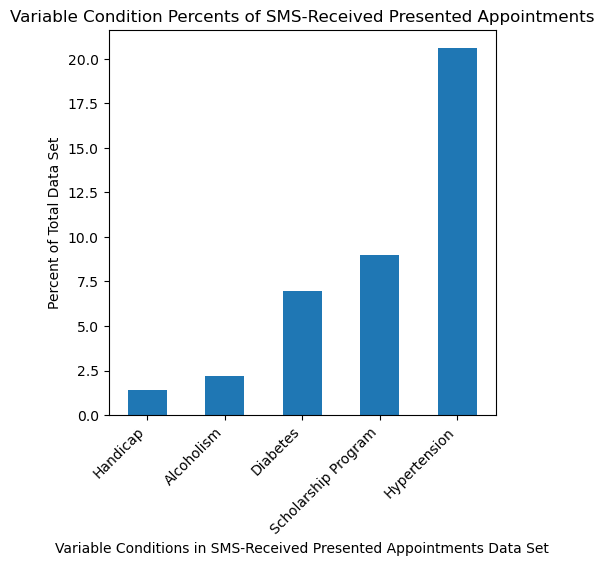

In [16]:
# create pandas series to graph and list of respective labels
condition_percents = pd.Series([1.40,  2.22, 6.97, 9.00, 20.58])
labels = ['Handicap', 'Alcoholism', 'Diabetes', 'Scholarship Program', 'Hypertension']


# plot graph of variable condition percentages
plt.figure(figsize=(5,5))
ax = condition_percents.plot(kind='bar')
ax.set_title('Variable Condition Percents of SMS-Received Presented Appointments')
ax.set_xlabel('Variable Conditions in SMS-Received Presented Appointments Data Set')
ax.set_ylabel('Percent of Total Data Set')
ax.set_xticklabels(labels, rotation=45, ha='right')

# These are descriptive statistics of ROWS THAT RECEIVED SMS REMINDER AND PRESENTED AT THE APPOINTMENT. 

- __The average age is 39 (38.81 rounded).__
- __The median age is 40.0__
- __The average time between the ScheduledDay and AppointmentDay is 17 (17.3 rounded) days.__
- __Approximately 9.02% of SMS-Received and Presented appointments are for patients enrolled in the 'scholarship' program (explained earlier in analysis).__
- __Approximately 20.58% of SMS-Received and Presented are for patients suffering from hipertension (hypertension).__
- __Approximately 6.97% of SMS-Received and Presented are for patients suffering from diabetes.__
- __Approximately 2.22% of SMS-Received and Presented are for patients suffering from alcoholism.__
- __Approximately 1.4% of SMS-Received and Presented are for patients identifying as handicapped.__
- __Approximately 31.95% of all SMS-Received and Presented rows were for appointments for male patients.__
- __Approximately 68.05% of all SMS-Received and Presented rows were for appointments for female patients.__
- __Approximately 22.86% of SMS-Received and Presented for Youths.__
- __Approximately 22.78% of SMS-Received and Presented for Young Adults.__ 
- __Approximately 27.28% of SMS-Received and Presented for Adults.__
- __Approximately 27.08% of SMS-Received and Presented for Older Adults and Seniors.__ 
- __Approximately 83.78%% of SMS-Received and Presented were scheduled between 2 and 30 days out.__
- __Approximately 12.9% of SMS-Received and Presented scheduled between 31 and 60 days out.__
- __Approximately 3.31%% of SMS-Received and Presented scheduled between 61 and 90 days out.__

In [17]:
1==1

True